## KMeans - Agrupamento de Dados

## Importando bibliotecas ##

In [1]:
import pandas as pd # Importa a biblioteca pandas para manipulação e análise de dados
import matplotlib.pyplot as plt # Importa a biblioteca matplotlib para criação de gráficos e visualizações
import seaborn as sns # Importa a biblioteca seaborn para visualização de dados estatísticos, construída sobre o matplotlib
from sklearn.cluster import KMeans # Importa o algoritmo KMeans do módulo sklearn.cluster para agrupamento

## Carregando a base de dados iris

In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


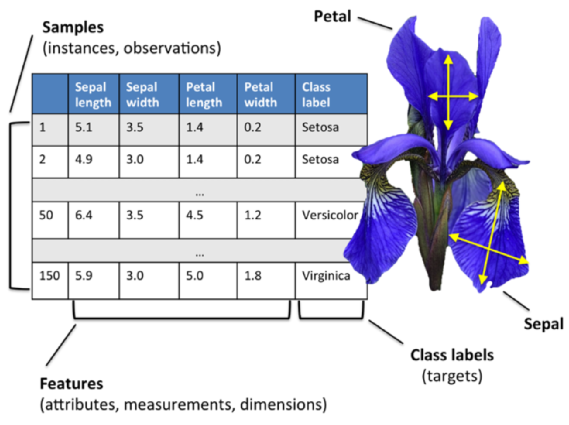

In [4]:
from IPython.display import Image
Image(filename ="iris-data-set.png", width=500, height=500) # Exibe uma imagem do dataset Iris

## Separando os valores de dados e classes

In [5]:
X = iris.drop('Species',axis=1) # Separa os dados de entrada (features) removendo a coluna 'Species'
X[:10]

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [6]:
y = iris.Species # Atribui a coluna 'Species' do DataFrame 'iris' à variável 'y' (classes/rótulos)
y.unique() # Exibe os valores únicos presentes na coluna 'Species'

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Convertendo valores categórios de classe em numéricos

In [7]:
# Função para converter os rótulos de classe categóricos em valores numéricos
def converte_classe(l):
    if l == 'Iris-virginica':
        return 0
    elif l == 'Iris-setosa':
        return 1
    elif l == 'Iris-versicolor':
        return 2

In [8]:
# Aplica a função 'converte_classe' para transformar os rótulos de classe categóricos em valores numéricos
y = y.apply(converte_classe)
y.value_counts()

Species
1    50
2    50
0    50
Name: count, dtype: int64

## Instânciando o Algoritmo K-means com 3 clusters ##

In [9]:
# Instancia o algoritmo KMeans com 3 clusters e inicialização aleatória
kmeans = KMeans(n_clusters = 3, init = 'random')

In [10]:
# Treina o modelo K-means com os dados de entrada (features)
kmeans.fit(X)

,n_clusters,3
,init,'random'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


## Centroids ##

In [11]:
kmeans.cluster_centers_ # Exibe as coordenadas dos centroids de cada cluster

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ]])

## Tabela de distância ##

In [12]:
# Calcula a distância de cada ponto de dado para cada centroid de cluster e exibe as distâncias
distance = kmeans.fit_transform(X)
distance

array([[3.41925061, 0.14694217, 5.0595416 ],
       [3.39857426, 0.43816892, 5.11494335],
       [3.56935666, 0.41230086, 5.27935534],
       [3.42240962, 0.51883716, 5.15358977],
       [3.46726403, 0.19796969, 5.10433388],
       [3.14673162, 0.68380699, 4.68148797],
       [3.51650264, 0.41520116, 5.21147652],
       [3.33654987, 0.0599333 , 5.00252706],
       [3.57233779, 0.80099438, 5.32798107],
       [3.3583767 , 0.36659514, 5.06790865],
       [3.32449131, 0.48784424, 4.89806763],
       [3.31126872, 0.25138019, 4.9966845 ],
       [3.46661272, 0.49192682, 5.19103612],
       [3.90578362, 0.90906105, 5.65173594],
       [3.646649  , 1.02019214, 5.10804455],
       [3.49427881, 1.21309192, 4.88564095],
       [3.495248  , 0.66241377, 5.03090587],
       [3.38444981, 0.1509702 , 5.02342022],
       [3.11245944, 0.82848778, 4.61792995],
       [3.37738931, 0.39898872, 4.97213426],
       [3.07471224, 0.46172719, 4.6955761 ],
       [3.31506588, 0.33762701, 4.9236821 ],
       [3.

In [13]:
# Exibe as distâncias do primeiro ponto de dado para cada centroid de cluster
distance[0]

array([3.41925061, 0.14694217, 5.0595416 ])

## Visualizando valores de distância para cada cluster ##

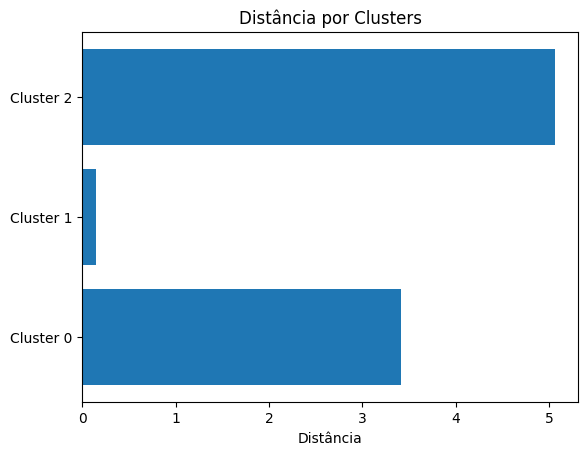

In [16]:
%matplotlib inline
# Define os nomes dos clusters para o eixo y
x = ['Cluster 0', 'Cluster 1', 'Cluster 2']

# Cria um gráfico de barras horizontais para mostrar as distâncias do primeiro ponto de dado para cada cluster
plt.barh(x, distance[0])

# Adiciona o rótulo ao eixo x
plt.xlabel('Distância')
# Adiciona o título ao gráfico
plt.title('Distância por Clusters')

# Exibe o gráfico
plt.show()

## Imprimindo Rótulos ##

In [17]:
labels = kmeans.labels_ # Atribui os rótulos de cluster gerados pelo KMeans a variável 'labels'
labels # Exibe os rótulos de cluster para cada ponto de dado

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

## Visualizando os Centroids ##

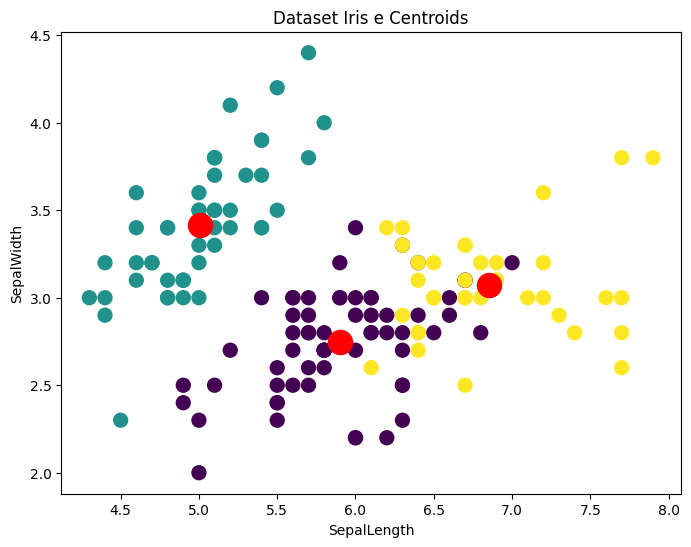

In [24]:
%matplotlib inline
# Visualiza os clusters e os centroids do algoritmo KMeans
plt.figure(figsize=(8,6)) # Cria uma nova figura e eixos para o gráfico com um tamanho específico
plt.scatter(X['SepalLength'], X['SepalWidth'], s = 100, c = kmeans.labels_) # Cria um gráfico de dispersão dos dados de comprimento e largura da sépala, colorindo os pontos de acordo com os rótulos dos clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids') # Adiciona os centroids dos clusters ao gráfico de dispersão, marcando-os em vermelho e maiores
plt.title('Dataset Iris e Centroids') # Define o título do gráfico
plt.xlabel('SepalLength') # Define o rótulo do eixo x como 'SepalLength' (Comprimento da Sépala)
plt.ylabel('SepalWidth') # Define o rótulo do eixo y como 'SepalWidth' (Largura da Sépala)
plt.show() # Exibe o gráfico

## Agrupando novos dados ##

In [25]:
# Novos dados de entrada para serem agrupados
data = [
    [ 4.12, 3.4, 1.6, 0.7],
    [ 5.2, 5.8, 5.2, 6.7],
    [ 3.1, 3.5, 3.3, 3.0]
    ]
# Prevê o cluster para cada novo ponto de dado usando o modelo KMeans treinado
kmeans.predict(data)

c:\Users\Cliente\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1, 2, 0], dtype=int32)

## Visualizando os resultados ##

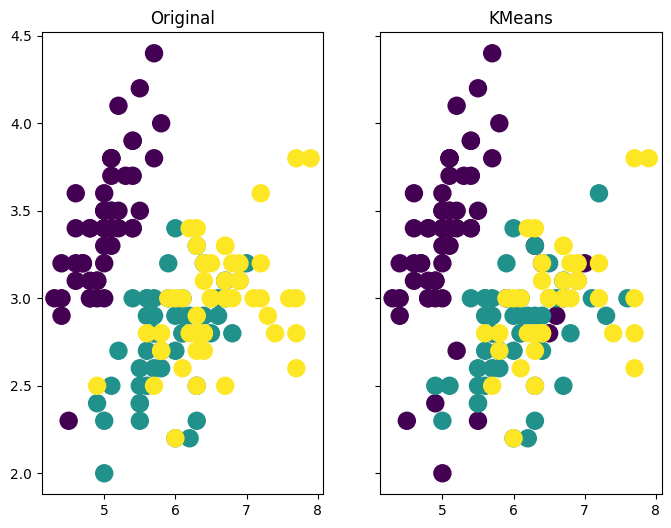

In [26]:
%matplotlib inline
# Cria uma figura e um conjunto de subplots (ax1, ax2) com 1 linha e 2 colunas.
# sharey=True garante que ambos os subplots compartilhem o mesmo eixo y.
# figsize=(8,6) define o tamanho da figura.
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,6))

# Define o título do primeiro subplot como 'Original'.
ax1.set_title('Original')
# Cria um gráfico de dispersão no primeiro subplot:
# - X['SepalLength'] no eixo x, X['SepalWidth'] no eixo y.
# - s=150 define o tamanho dos marcadores.
# - c=sorted(y) define a cor dos pontos com base nos rótulos originais, garantindo que a ordenação para cores seja consistente.
ax1.scatter(X['SepalLength'], X['SepalWidth'],s=150,c=sorted(y))

# Define o título do segundo subplot como 'KMeans'.
ax2.set_title('KMeans')
# Cria um gráfico de dispersão no segundo subplot:
# - X['SepalLength'] no eixo x, X['SepalWidth'] no eixo y.
# - s=150 define o tamanho dos marcadores.
# - c=sorted(kmeans.labels_) define a cor dos pontos com base nos rótulos de cluster do KMeans, garantindo a ordenação para cores.
ax2.scatter(X['SepalLength'], X['SepalWidth'],s=150,c=sorted(kmeans.labels_))

## Estimando o valor do parametro K - Método Elbow

1 680.8244000000001
2 152.36870647733906
3 78.940841426146
4 57.344923809523806
5 46.554053846153835
6 38.95701115711986
7 34.30123936932633
8 30.810028711484595
9 28.339698463088496
10 26.519012130026837


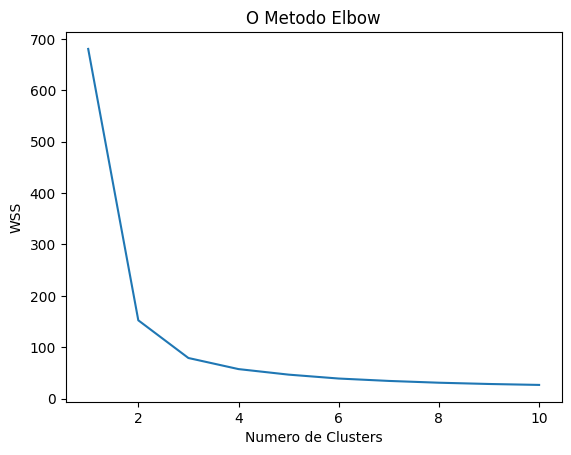

In [28]:
%matplotlib inline
%matplotlib inline
# Lista para armazenar o WCSS (Within-Cluster Sum of Square) para cada número de clusters
wcss = []

# Itera de 1 a 10 para testar diferentes números de clusters (k)
for i in range(1, 11):
    # Instancia o algoritmo KMeans com 'i' clusters e inicialização aleatória
    kmeans2 = KMeans(n_clusters = i, init = 'random')
    # Treina o modelo KMeans com os dados de entrada
    kmeans2.fit(X)
    # Imprime o número de clusters e o valor de WCSS (inertia) para a iteração atual
    print (i,kmeans2.inertia_)
    # Adiciona o valor de WCSS à lista
    wcss.append(kmeans2.inertia_)
    
# Cria um gráfico de linha para visualizar o método Elbow
plt.plot(range(1, 11), wcss)
# Define o título do gráfico
plt.title('O Metodo Elbow')
# Define o rótulo do eixo x
plt.xlabel('Numero de Clusters')
# Define o rótulo do eixo y (WCSS)
plt.ylabel('WSS') 
# Exibe o gráfico
plt.show()

## Técnicas de Validação

### Matriz de Confusão

In [30]:
# Cria uma tabela cruzada (crosstab) para comparar os rótulos reais (y) com os rótulos preditos pelo modelo KMeans (kmeans.labels_)
# rownames=['Real'] define o nome das linhas como 'Real' (rótulos reais)
# colnames=['Predito'] define o nome das colunas como 'Predito' (rótulos preditos)
# margins=True adiciona uma linha e uma coluna de totais na tabela
print(pd.crosstab(y, kmeans.labels_, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2  All
Real                    
0        14   0  36   50
1         0  50   0   50
2        48   0   2   50
All      62  50  38  150


### Metricas de classificação

In [31]:
from sklearn import metrics # Importa o módulo metrics do sklearn para avaliação de modelos
clusters = ['Cluster 2','Cluster 1','Cluster 0'] # Define os nomes dos clusters para serem usados no relatório de classificação
# Imprime um relatório de classificação detalhado, comparando os rótulos reais (y)
# com os rótulos preditos pelo KMeans (kmeans.labels_), e usando os nomes dos clusters definidos.
print(metrics.classification_report(y,kmeans.labels_,target_names=clusters))

              precision    recall  f1-score   support

   Cluster 2       0.23      0.28      0.25        50
   Cluster 1       1.00      1.00      1.00        50
   Cluster 0       0.05      0.04      0.05        50

    accuracy                           0.44       150
   macro avg       0.43      0.44      0.43       150
weighted avg       0.43      0.44      0.43       150

